# IRIS Dataset & Numpy Neural Net

Download and extract iris.data from https://archive.ics.uci.edu/dataset/53/iris

In [2]:
import pandas as pd
import numpy as np

0/1 dummy values from text:

In [3]:
df = pd.get_dummies(pd.read_csv('iris.data', names=['X1', 'X2', 'X3', 'X4', 'Y']), 
                    dtype='int8')
df

X1   X2   X3   X4  Y_Iris-setosa  Y_Iris-versicolor  Y_Iris-virginica
0    5.1  3.5  1.4  0.2              1                  0                 0
1    4.9  3.0  1.4  0.2              1                  0                 0
2    4.7  3.2  1.3  0.2              1                  0                 0
3    4.6  3.1  1.5  0.2              1                  0                 0
4    5.0  3.6  1.4  0.2              1                  0                 0
..   ...  ...  ...  ...            ...                ...               ...
145  6.7  3.0  5.2  2.3              0                  0                 1
146  6.3  2.5  5.0  1.9              0                  0                 1
147  6.5  3.0  5.2  2.0              0                  0                 1
148  6.2  3.4  5.4  2.3              0                  0                 1
149  5.9  3.0  5.1  1.8              0                  0                 1

[150 rows x 7 columns]

In [4]:
X = np.array(df.iloc[:,:4])
X[:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [5]:
Y = np.array(df.iloc[:,-3:])
Y[:3,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int8)

Get the label number from the dummy/one-hot version:

In [6]:
Y.argmax(1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

With the label number we can have a nice plot of the three classes:

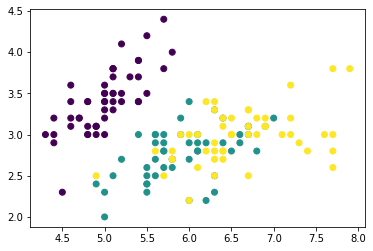

In [7]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y.argmax(1))

Initialise the weight matrix U with random numbers: we have 4 values in each input, and we want 5 values
in the hidden layer:

In [8]:
U = np.random.random((5, 4))
U

array([[0.13122194, 0.12149409, 0.95190549, 0.60661816],
       [0.99499415, 0.2654161 , 0.74450711, 0.8398472 ],
       [0.91555001, 0.95279109, 0.84185182, 0.33710436],
       [0.03544022, 0.25851415, 0.93367064, 0.0601671 ],
       [0.59978523, 0.75945207, 0.42661966, 0.21609641]])

Use sigmoid as the activation function:

In [9]:
def f(x):
    return 1 / (1 + np.exp(-1 * x))

Hidden layer values for the first observation:

In [10]:
h = f(np.dot(U, X[0,:]))
h

array([0.92746949, 0.99926412, 0.99990391, 0.91718629, 0.99826926])

If we want 3 values in the output layer we need the second weight matrix V to be 3 x 5 (since it
gets its input from the hidden layer):

In [11]:
V = np.random.random((3, 5)) 
V

array([[0.5377672 , 0.05209954, 0.60249229, 0.66968872, 0.65041773],
       [0.23197203, 0.06459791, 0.38613504, 0.0850163 , 0.92098824],
       [0.39323902, 0.10200213, 0.82282637, 0.14606094, 0.87084495]])

Now we can comput the final output for the first observation:

In [12]:
o = f(np.dot(V, h))
o

array([0.91809791, 0.84066245, 0.90827018])

In sklearn the correct classes need to be numbered labels; since sklearn.datasets already 
contains the Iris dataset we can just use this:

In [13]:
from sklearn import datasets
ds = datasets.load_iris()
X = ds.data
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The performance is not too bad:

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('training size:', X_train.shape[0], 
      'testing size:', X_test.shape[0],
      'label counts:', np.unique(y_train, return_counts=True)[1])

clf = MLPClassifier(hidden_layer_sizes=(100,),
                    max_iter=50).fit(X_train, y_train)

print('score train:', clf.score(X_train, y_train))
print('score test: ', clf.score(X_test, y_test))

(150, 4) (150,)
training size: 120 testing size: 30 label counts: [41 38 41]
score train: 0.725
score test:  0.6333333333333333


/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
